<a href="https://colab.research.google.com/github/mascalmeida/colab_classes/blob/main/Classification_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Prática - Aprendizagem Estatística (<a href="http://www.gamma.ufba.br/">Gamma</a>)

## Modelos de Classificação

Docente: Karla Esquerre (<a href="https://github.com/kesquerre">@kesquerre</a>)

Facilitador: Lucas Mascarenhas (<a href="https://github.com/mascalmeida">@mascalmeida</a>)

Este código tem como objetivo apresentar o passo a passo básico de como criar um modelo de classificação usando o Python/Colab.

## Pacotes e Definindo a semente (seed)

In [1]:
# Pacotes

## Dataset
from sklearn.datasets import load_iris

# STRUCTURAL PACKAGES ----------------------------------------------------------
## Manipulação de dados
import pandas as pd
## Operate data
import numpy as np
## random package for set seed function
import random

# VISUALIZATION ----------------------------------------------------------------
## Categorical data
import seaborn as sns
## Numerical data
import matplotlib.pyplot as plt

# DATA SCIENCE -----------------------------------------------------------------
## Scale a data frame
from sklearn.preprocessing import StandardScaler, MinMaxScaler
## Split dataset to train and test
from sklearn.model_selection import train_test_split
## Classification Models
from sklearn.ensemble import RandomForestClassifier
## Tuning parameter with croos-validation (k-fold)
from sklearn.model_selection import GridSearchCV
## Metrics
from sklearn.metrics import classification_report, confusion_matrix
#Install -> !pip install scikit-plot
!pip install scikit-plot
import scikitplot as skplt

# Garantindo a reprodutibilidade
## Set seed function
seed = 1000
print('Seed =', seed)

Seed = 1000


## Importando dados

In [2]:
# Importando dados
## Carregando dados iris
iris = load_iris()
## Transformando em um dataframe pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
## Adicionando uma variável
df['target']=iris.target
## Criando uma variável
df['target_name'] = iris.target_names[2]
df.loc[df['target'] == 0, 'target_name'] = iris.target_names[0]
df.loc[df['target'] == 1, 'target_name'] = iris.target_names[1]
## Exibindo o dataframe
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Criando o output

In [3]:
# Definindo output
## Preservando o dataset original
dt = df.copy()
## Visualizando quantidade de classes
print(dt['target_name'].value_counts())

## Criando variável - Setosa
dt['setosa'] = 0
## Adicionando os eventos a variável - Setosa
dt.loc[dt['target_name'] == 'setosa', 'setosa'] = 1

## Criando variável - Versicolor
dt['versicolor'] = 0
## Adicionando os eventos a variável - Versicolor
dt.loc[dt['target_name'] == 'versicolor', 'versicolor'] = 1

## Criando variável - Virginica
dt['virginica'] = 0
## Adicionando os eventos a variável - Virginica
dt.loc[dt['target_name'] == 'virginica', 'virginica'] = 1

## Exibindo o dataframe
display(dt)

virginica     50
setosa        50
versicolor    50
Name: target_name, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,setosa,1,0,0
1,4.9,3.0,1.4,0.2,0,setosa,1,0,0
2,4.7,3.2,1.3,0.2,0,setosa,1,0,0
3,4.6,3.1,1.5,0.2,0,setosa,1,0,0
4,5.0,3.6,1.4,0.2,0,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0,0,1
146,6.3,2.5,5.0,1.9,2,virginica,0,0,1
147,6.5,3.0,5.2,2.0,2,virginica,0,0,1
148,6.2,3.4,5.4,2.3,2,virginica,0,0,1


## Separando inputs x outputs

In [4]:
# Separando entradas e saídas
## Output
y = dt['setosa']
## Inputs
x = dt.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
## Exibindo
display(y, x)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: setosa, Length: 150, dtype: int64

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Definindo treino x teste

In [5]:
# Dividindo dataset em treino e teste
## Split training and test dataset
x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(x, 
                                                                      y, 
                                                                      stratify=y,
                                                                      random_state = seed,
                                                                      test_size = 0.25)

## Normalizando dados

In [6]:
# Scale dataset
## Fit based on data train
scaler_fit = MinMaxScaler().fit(x_train_unscaled)
## Transform data train and data test
x_train = pd.DataFrame(scaler_fit.transform(x_train_unscaled), 
                       columns=x_train_unscaled.columns, 
                       index=x_train_unscaled.index)
x_test = pd.DataFrame(scaler_fit.transform(x_test_unscaled), 
                      columns=x_test_unscaled.columns,
                      index=x_test_unscaled.index)
## Exibindo dados
display(x_train, x_test.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
66,0.363636,0.363636,0.578947,0.583333
17,0.212121,0.590909,0.035088,0.083333
141,0.757576,0.409091,0.684211,0.916667
115,0.606061,0.454545,0.719298,0.916667
76,0.727273,0.272727,0.631579,0.541667
...,...,...,...,...
25,0.181818,0.363636,0.070175,0.041667
140,0.696970,0.409091,0.771930,0.958333
122,1.000000,0.272727,0.964912,0.791667
149,0.454545,0.363636,0.684211,0.708333


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
18,0.393939,0.727273,0.087719,0.083333
129,0.848485,0.363636,0.807018,0.625000
33,0.333333,0.909091,0.035088,0.041667
131,1.060606,0.727273,0.912281,0.791667
13,-0.030303,0.363636,-0.017544,0.000000


## Criando instância e definindo os parâmetros para validação cruzada

- Random Forest Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [7]:
# Grid Search Cross-Validation
## Define 'K' for K-Fold
k = 5
## Defining parameter range to grid search
param_grid = [{'n_estimators': [2000],
               'bootstrap': [True, False]}]
## Define method instance  
clf = RandomForestClassifier(random_state=seed)

## Treinando o modelo (validação cruzada)

In [8]:
## Define grid instance
grid = GridSearchCV(estimator=clf, 
                    param_grid=param_grid, 
                    cv=k,
                    scoring='f1')
## Initialize grid search, fitting the best model
grid.fit(x_train, y_train); 

# Results
print('Model =', grid.best_params_)

Model = {'bootstrap': True, 'n_estimators': 2000}


## Avaliando o model

MODEL -------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



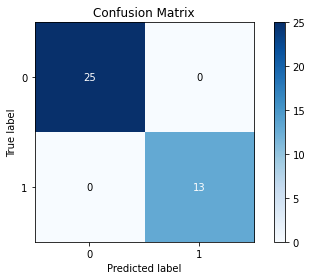

In [9]:
## Make predictions over test set for both models
pred = grid.predict(x_test)
## print classification report
print('MODEL -------------------------------------------------------\n', 
      classification_report(y_test, pred))
##Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False, title='Confusion Matrix')
plt.tight_layout()
plt.show();